[0, 2.0, 3.385, 4.375, 5.19, 6.035, 6.795, 7.55, 8.315, 8.88, 9.53, 10.085, 10.685, 11.17, 11.69, 12.16, 12.625, 13.085, 13.455, 13.905, 14.27, 14.675, 15.12, 15.46, 15.795, 16.19, 16.53, 16.895, 17.23, 17.555, 17.95, 18.265, 18.55, 18.845, 19.14, 19.415, 19.74, 20.075, 20.385, 20.675, 20.97, 21.235, 21.52, 21.785, 22.0, 22.3, 22.55, 22.77, 23.04, 23.32, 23.61, 23.85, 24.085, 24.31, 24.59, 24.87, 25.11, 25.315, 25.535, 25.765, 25.96, 26.235, 26.49, 26.625, 26.85, 27.095, 27.345, 27.57, 27.73, 27.875, 28.095, 28.345, 28.555, 28.715, 28.87, 29.075, 29.24, 29.39, 29.605, 29.805, 30.055, 30.225, 30.42, 30.61, 30.795, 31.06, 31.28, 31.55, 31.78, 31.975, 32.165, 32.39, 32.555, 32.775, 33.005, 33.17, 33.295, 33.46, 33.68, 33.845, 34.045, 34.245, 34.445, 34.625, 34.805, 34.99, 35.16, 35.445, 35.6, 35.81, 35.955, 36.15, 36.34, 36.49, 36.67, 36.78, 36.92, 37.05, 37.145, 37.33, 37.48, 37.605, 37.745, 37.935, 38.14, 38.35, 38.49, 38.64, 38.795, 38.97, 39.135, 39.275, 39.44, 39.56, 39.72, 39.915, 4

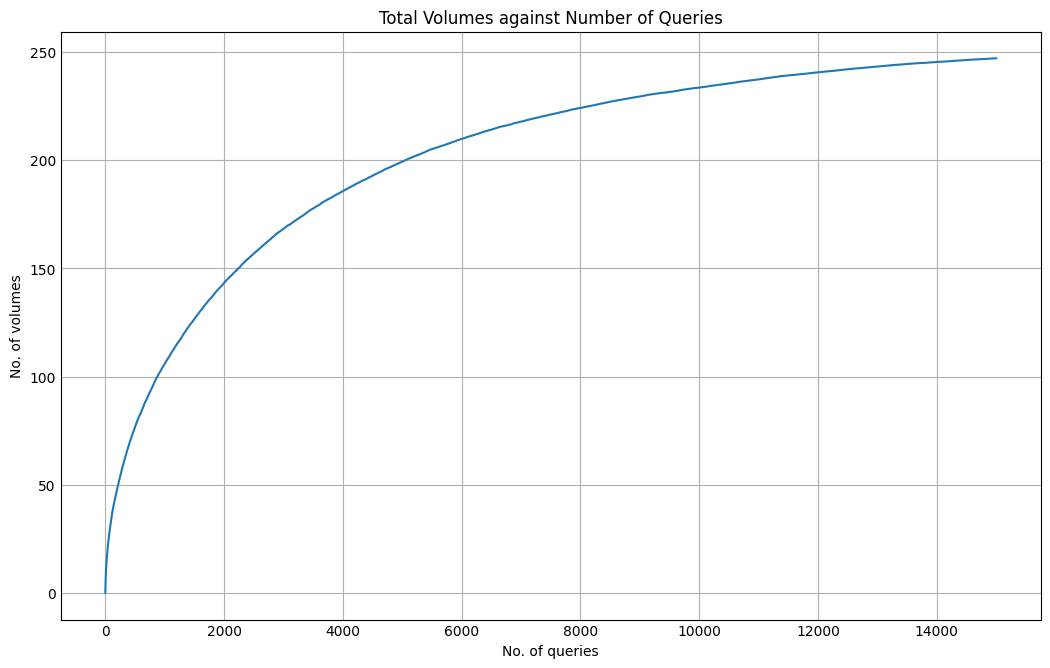

In [3]:
import math 
import random 
import matplotlib.pyplot as plt 

#overcoveraugwithreplacement

RSEmax = 256

def is_power_of_two(x):
    return (x & (x - 1)) == 0

def overcover(start, end):
    diff = (end - start) - 1
    while True:
        diff += 1
        if is_power_of_two(diff + 1):  # Check if diff + 1 is a power of 2
            N = math.log(diff + 1, 2)
            break
    if start == end:
        return (start, end)
    elif start == end - 1:
        return (start, end)
    else:
        for i in range(int(N), int(math.log(RSEmax, 2)) + 1):  # Ensure N is an integer
            for j in range(0, start):
                if (start - j) % 2**(i-1) == 1:
                    if start - j + 2**i - 1 >= end:
                        return (start - j, start - j + 2**i - 1)
                    else:
                        break

def query_gen():
    query_range_list = []
    for i in range (RSEmax):
        for j in range (i+1):
            query_range_list.append(j)
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)

max_volumes = 3*RSEmax - (math.log(RSEmax, 2) + 2)
no_of_runs = 200
no_of_queries = 15000
def augovercover_query(no_of_runs, no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            query_tracker.append(query_asked)
            (a, b) = query_asked
            query_list = overcover(a, b)
            for i in query_list:
                if i not in vol_tracker:
                    vol_tracker.append(i)
                    vol_sum +=1
            arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = augovercover_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()